## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv("QueryResults.csv",header=0,names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())
print(df.tail())


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
print(df.groupby("TAG")[["POSTS"]].sum())
print(df.groupby("TAG")[["POSTS"]].sum().max())

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
print(df.groupby("TAG")["DATE"].count())
print(df.groupby("TAG")["DATE"].count().idxmin())

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
type(df["DATE"][0])

In [ ]:
print(pd.to_datetime(df["DATE"][0]))

In [ ]:
df.DATE = pd.to_datetime(df["DATE"])
df

## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index="DATE",columns="TAG",values="POSTS")
reshaped_df

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

In [ ]:
reshaped_df.columns

In [ ]:
print(reshaped_df.head())
reshaped_df.tail()


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

In [ ]:
reshaped_df.fillna(0,inplace=True)

In [ ]:
reshaped_df.isna().values.all()

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
reshaped_df

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Number of Posts",fontsize=14)
plt.ylim(top=35000,bottom=0)
chart = plt.plot(reshaped_df.index,reshaped_df["java"])

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Number of Posts",fontsize=14)
plt.ylim(top=35000,bottom=0)
for i in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[i],linewidth=2,label=i)
plt.legend(fontsize=12)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

TAG           assembly            c           c#          c++      delphi  \
DATE                                                                        
2008-07-01         NaN          NaN          NaN          NaN         NaN   
2008-08-01         NaN          NaN          NaN          NaN         NaN   
2008-09-01         NaN          NaN          NaN          NaN         NaN   
2008-10-01         NaN          NaN          NaN          NaN         NaN   
2008-11-01         NaN          NaN          NaN          NaN         NaN   
...                ...          ...          ...          ...         ...   
2020-03-01  296.000000  2431.000000  8807.000000  4851.166667  168.666667   
2020-04-01  305.500000  2567.000000  8903.500000  5105.333333  183.333333   
2020-05-01  316.000000  2716.833333  9040.166667  5421.500000  190.166667   
2020-06-01  332.000000  2794.666667  9221.166667  5682.500000  202.000000   
2020-07-01  341.833333  2814.166667  9301.166667  5888.333333  207.666667   

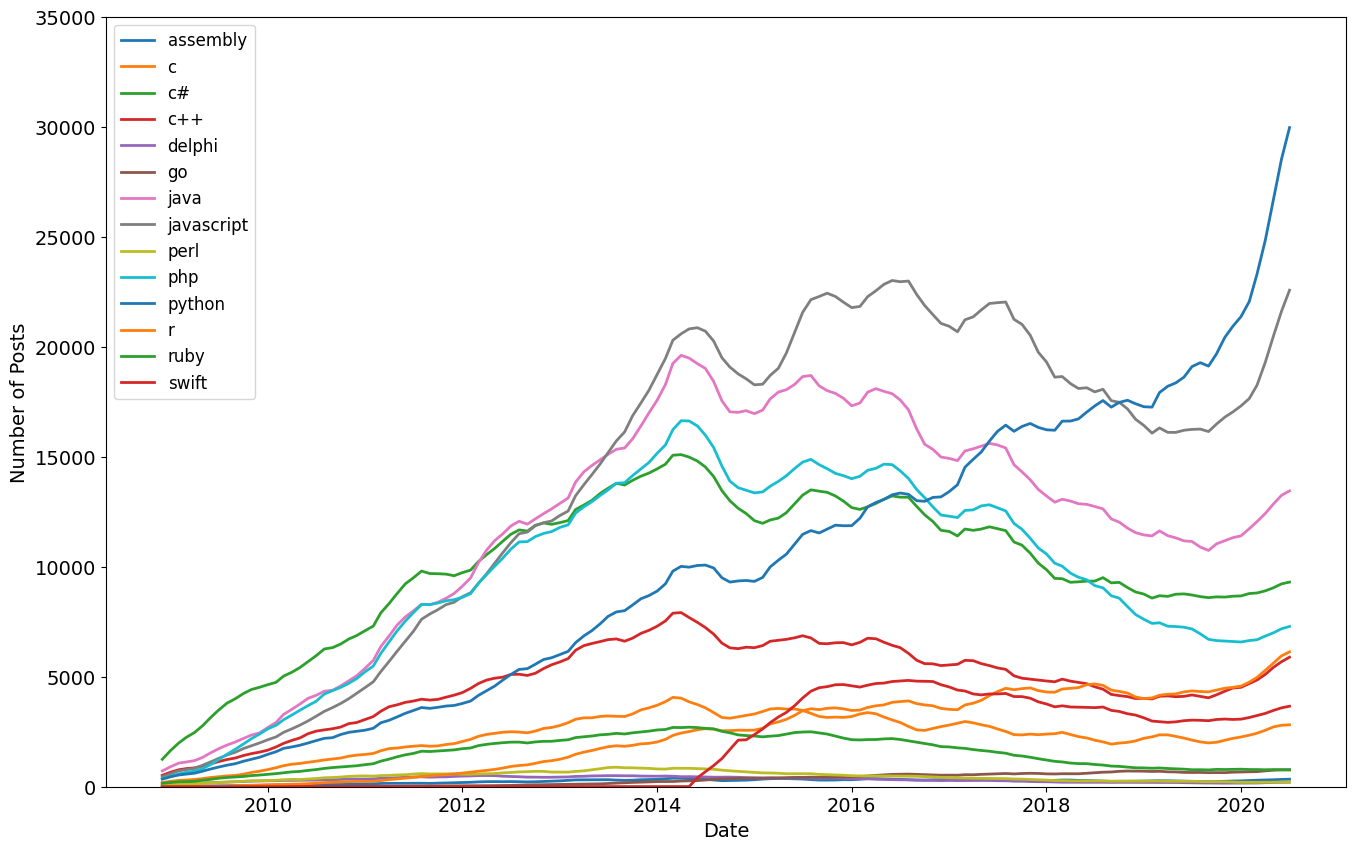

In [110]:
roll_df = reshaped_df.rolling(window=6).mean()
print(roll_df)
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Number of Posts",fontsize=14)
plt.ylim(top=35000,bottom=0)
for i in roll_df.columns:
    plt.plot(roll_df.index,roll_df[i],linewidth=2,label=i)
plt.legend(fontsize=12)
